In [15]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sb
from statsmodels.formula.api import ols

In [16]:
data=pd.read_csv('regression_data.csv',index_col=0)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   #                      107 non-null    object 
 1   gender                 107 non-null    object 
 2   years_from_grad        107 non-null    int64  
 3   age                    107 non-null    int64  
 4   highest_education      107 non-null    int64  
 5   prework_issues         107 non-null    int64  
 6   self_report_languages  107 non-null    int64  
 7   self_report_math       107 non-null    int64  
 8   household_income       107 non-null    int64  
 9   total_usr              107 non-null    int64  
 10  total_views            107 non-null    float64
 11  views_in_test          107 non-null    float64
 12  time_taken             107 non-null    int64  
 13  cog_irt                107 non-null    float64
 14  learn_irt              107 non-null    float64
 15  comp_i

In [18]:
# data.female=data.female.astype('category')
data.prework_issues=data.prework_issues.astype('category')
data.self_report_languages=data.self_report_languages.astype('category')
data.self_report_math=data.self_report_math.astype('category')
# data.household_income=data.household_income.astype('category')

In [19]:
data['prework_issues'].corr(data['learn_irt'])

-0.3228471628728746

In [20]:
corr_matrix=data.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.3]
high_corr = high_corr.stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(high_corr)

           Variable 1         Variable 2  Correlation
0     years_from_grad    years_from_grad     1.000000
1     years_from_grad                age     0.675727
2                 age    years_from_grad     0.675727
3                 age                age     1.000000
4                 age  highest_education     0.486229
5   highest_education                age     0.486229
6   highest_education  highest_education     1.000000
7    household_income   household_income     1.000000
8           total_usr          total_usr     1.000000
9           total_usr          learn_irt     0.481599
10          total_usr           comp_irt     0.424843
11        total_views        total_views     1.000000
12        total_views          learn_irt     0.325514
13      views_in_test      views_in_test     1.000000
14         time_taken         time_taken     1.000000
15         time_taken            cog_irt     0.356724
16            cog_irt         time_taken     0.356724
17            cog_irt       

<AxesSubplot:>

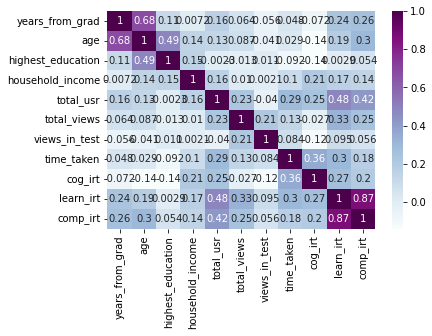

In [21]:
sb.heatmap(data.corr(), cmap="BuPu", annot=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   #                      107 non-null    object  
 1   gender                 107 non-null    object  
 2   years_from_grad        107 non-null    int64   
 3   age                    107 non-null    int64   
 4   highest_education      107 non-null    int64   
 5   prework_issues         107 non-null    category
 6   self_report_languages  107 non-null    category
 7   self_report_math       107 non-null    category
 8   household_income       107 non-null    int64   
 9   total_usr              107 non-null    int64   
 10  total_views            107 non-null    float64 
 11  views_in_test          107 non-null    float64 
 12  time_taken             107 non-null    int64   
 13  cog_irt                107 non-null    float64 
 14  learn_irt              107 non-null    flo

In [23]:
ind=data.iloc[:,1:14]
ind.pop('total_usr')
# ind.pop('household_income')
# ind.pop('female')
ind.pop('views_in_test')
ind.pop('self_report_languages')
ind.pop('self_report_math')
ind.pop('prework_issues')
ind.pop('age')
y=data['comp_irt']

<AxesSubplot:>

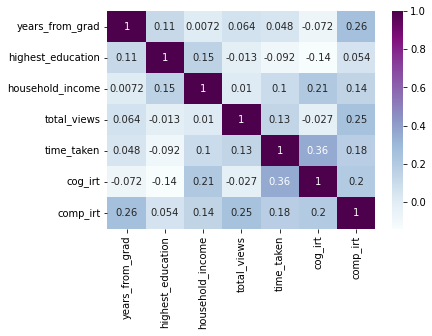

In [24]:
mp=ind.join(data['comp_irt'])
sb.heatmap(mp.corr(), cmap="BuPu", annot=True)

In [25]:
fit = ols(
    "comp_irt ~ C(gender) + C(highest_education, Treatment(1)) + C(household_income, Treatment(1)) + years_from_grad + total_views + time_taken + cog_irt",
    data=mp,
).fit()


fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               comp_irt   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.943
Date:                Wed, 17 Jan 2024   Prob (F-statistic):            0.00394
Time:                        16:42:49   Log-Likelihood:                -118.73
No. Observations:                 107   AIC:                             257.5
Df Residuals:                      97   BIC:                             284.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -0.5756      0.458     -1.256      0.212      -1.485       0.334
C(gender)[T.Male]                           0.1502      0.155      0.968      0.335      -0.158       0.458
C(highest_education, Treatment(1))[T.2]    -0.2331      0.317     -0.735      0.464      -0.863       0.396
C(highest_education, Treatment(1))[T.3]     0.0728      0.382      0.191      0.849      -0.685       0.831
C(household_income, Treatment(1))[T.2]      0.2252      0.182      1.241      0.218      -0.135       0.585
C(household_income, Treatment(1))[T.3]      0.1134      0.202      0.563      0.575      -0.287       0.513
years_from_grad                             0.0718      0.023      3.106      0.002       0.026       0.118
total_views                                 0.0765      0.029      2.650      0.009       0.019       0.134
time_taken                                  0.0016      0.004      0.402      0.689      -0.006       0.010
cog_irt                                     0.1864      0.090      2.060      0.042       0.007       0.366
==============================================================================
Omnibus:                        1.415   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.296
Skew:                           0.129   Prob(JB):                        0.523
Kurtosis:                       2.526   Cond. No.                         541.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

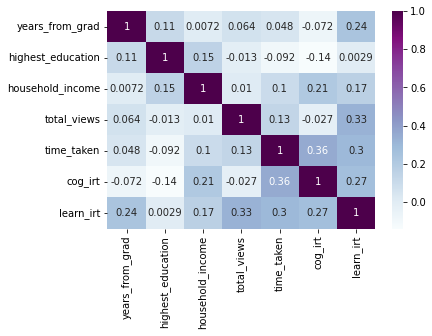

In [26]:
mp=ind.join(data['learn_irt'])
sb.heatmap(mp.corr(), cmap="BuPu", annot=True)

In [27]:
ind.columns

Index(['gender', 'years_from_grad', 'highest_education', 'household_income',
       'total_views', 'time_taken', 'cog_irt'],
      dtype='object')

In [28]:
fit = ols('learn_irt ~ C(gender) + C(highest_education, Treatment(1)) + C(household_income, Treatment(1)) + years_from_grad + total_views + time_taken + cog_irt', data=mp).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              learn_irt   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.192
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           0.000135
Time:                        16:42:50   Log-Likelihood:                -113.78
No. Observations:                 107   AIC:                             247.6
Df Residuals:                      97   BIC:                             274.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -0.9487      0.437     -2.169      0.033      -1.817      -0.080
C(gender)[T.Male]                           0.1009      0.148      0.681      0.497      -0.193       0.395
C(highest_education, Treatment(1))[T.2]    -0.1431      0.303     -0.473      0.638      -0.744       0.458
C(highest_education, Treatment(1))[T.3]    -0.0001      0.365     -0.000      1.000      -0.724       0.724
C(household_income, Treatment(1))[T.2]      0.1208      0.173      0.697      0.488      -0.223       0.465
C(household_income, Treatment(1))[T.3]      0.1804      0.192      0.938      0.351      -0.201       0.562
years_from_grad                             0.0602      0.022      2.727      0.008       0.016       0.104
total_views                                 0.0924      0.028      3.356      0.001       0.038       0.147
time_taken                                  0.0063      0.004      1.631      0.106      -0.001       0.014
cog_irt                                     0.2046      0.086      2.368      0.020       0.033       0.376
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.232
Skew:                          -0.167   Prob(JB):                        0.540
Kurtosis:                       3.406   Cond. No.                         541.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
sX = np.std(data['learn_irt'])
sY = np.std(data['cog_irt'])
r = 0.2118 / (sX * sY)

In [30]:
print(r,r**2)

0.278662465372533 0.07765276960749815


In [31]:
(np.corrcoef(data['learn_irt'],data['cog_irt'])[1,0])

0.2703832548377544

In [32]:
# print(answer.summary().as_latex())